In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

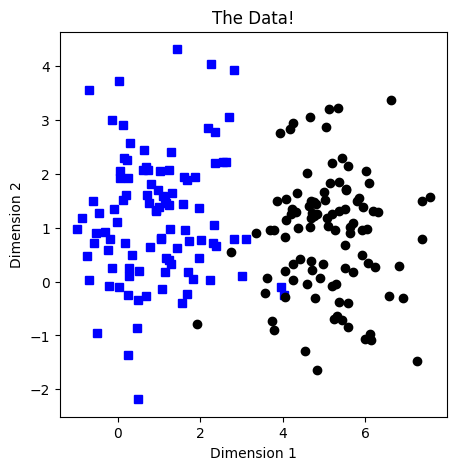

In [2]:
nPerClust = 100
blur = 1
A = [1,1]
B = [5,1]

a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

labels_np = np.vstack((
    np.zeros((nPerClust,1)),
    np.ones((nPerClust,1))
))

data_np = np.hstack((a,b)).T

data = torch.tensor(data_np,dtype=torch.float)
labels = torch.tensor(labels_np,dtype=torch.float)

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The Data!')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


In [9]:
ANNclassify = nn.Sequential(
    nn.Linear(2,10),
    nn.ReLU(),
    nn.Linear(10,1),
    nn.Sigmoid(),
)

In [10]:
learningRate = 0.05
lossfun = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

In [11]:
numepochs = 1000
losses = np.zeros(numepochs)

for i in range(numepochs):
    yHat = ANNclassify(data)

    loss = lossfun(yHat, labels)
    losses[i] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

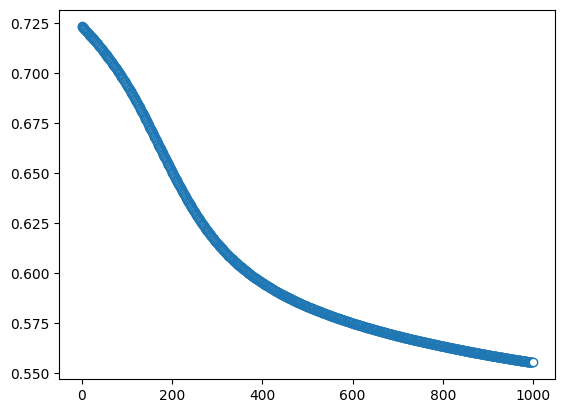

In [12]:
plt.plot(losses, 'o', mfc = 'w', lw = 0.1)
plt.show()


In [13]:
predictions = ANNclassify(data)

predlabels = predictions > 0.5

misclassified = np.where(predlabels != labels)[0]

totalacc = 100 - 100*len(misclassified)/len(labels)

print(f"Accuracy: {totalacc}%")

Accuracy: 93.0%


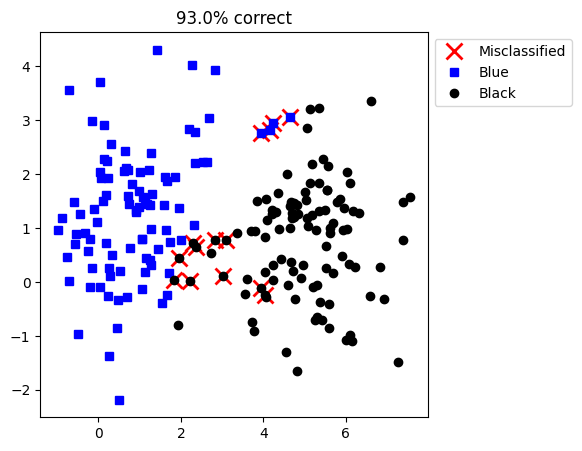

In [14]:
fig = plt.figure(figsize=(5,5))

plt.plot(data[misclassified,0],data[misclassified,1],'rx', ms=12, mew=2 )
plt.plot(data[np.where(~predlabels)[0],0], data[np.where(~predlabels)[0],1], 'bs')
plt.plot(data[np.where(predlabels)[0],0], data[np.where(predlabels)[0],1], 'ko')
plt.legend(['Misclassified','Blue','Black'], bbox_to_anchor=(1,1), loc='upper left')
plt.title(f"{totalacc}% correct")
plt.show()